# Вивчення асоціативних правил з використанням бібліотеки mlxtend

## Мета:
Навчитися застосовувати алгоритми пошуку асоціативних правил для аналізу даних з використанням бібліотеки mlxtend у Python.

## Кроки виконання:

### Завантаження та підготовка даних:

- Завантажте набір даних з Kaggle.
- Виберіть потрібні стовпці та видаліть порожні значення.
- Переконайтеся, що кількість придбаних товарів більша за 0.
- Перетворіть дані у формат, придатний для алгоритму Apriori (матриця, де рядки – це покупки, а стовпці – товари, значення – наявність товару в покупці).

### 

In [17]:
import pandas as pd
from pyECLAT import ECLAT
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [18]:
retail_df = pd.read_excel('datasets/retail.xlsx')

retail_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [19]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail_df['Description'] = retail_df['Description'].str.strip()

In [6]:
retail_df_filtered = retail_df[
      retail_df['Description'].notna()
      & ~retail_df['Description'].str.contains("test|return|wrong|crush|adjust|broke|check|crack|wet|fix|damage|miss|mix|lost|sold|throw|sample|smash|nan|adjustment|found|fault|unsale|mystery|dotcom|ebay|amazon|online|can't find|showroom", case=False, na=False)
      & retail_df['Quantity'] > 0
      & retail_df['CustomerID'].notna()
]

retail_df_filtered

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15,536367,22623,BOX OF VINTAGE JIGSAW BLOCKS,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
17,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
18,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
22,536368,22913,RED COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
23,536368,22912,YELLOW COAT RACK PARIS FASHION,3,2010-12-01 08:34:00,4.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541857,581580,22567,20 DOLLY PEGS RETROSPOT,1,2011-12-09 12:20:00,1.45,12748.0,United Kingdom
541859,581580,37500,TEA TIME TEAPOT IN GIFT BOX,1,2011-12-09 12:20:00,4.95,12748.0,United Kingdom
541878,581585,23356,LOVE HOT WATER BOTTLE,3,2011-12-09 12:31:00,5.95,15804.0,United Kingdom
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom


In [7]:
retail_df_filtered["Description"].value_counts()

Description
REGENCY CAKESTAND 3 TIER             977
SET OF 3 CAKE TINS PANTRY DESIGN     970
POSTAGE                              773
BAKING SET 9 PIECE RETROSPOT         656
RETROSPOT TEA SET CERAMIC 11 PC      635
                                    ... 
CAKE STAND LACE WHITE                  1
CURIOUS IMAGES SCRAP BOOK SET          1
BLACK DROP CRYSTAL NECKLACE            1
SET OF 12 T-LIGHTS VINTAGE DOILEY      1
FIRE POLISHED GLASS NECKL GOLD         1
Name: count, Length: 3753, dtype: int64

In [8]:
retail_products_df = retail_df_filtered.pivot_table(index='InvoiceNo', columns='Description', values='Quantity', aggfunc='sum', fill_value=0)

retail_products_df

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536381,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
C581490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,-11,0,0,0,0
C581499,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
retail_products_df = retail_products_df.map(lambda x: True if x > 0 else False)

retail_products_df

Description,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
536381,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
C581484,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C581490,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
C581499,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
retail_products = [list(set(retail_df_filtered[retail_df_filtered["InvoiceNo"] == invoice]['Description'])) for invoice in retail_df_filtered["InvoiceNo"].unique()]

retail_products

[['LOVE BUILDING BLOCK WORD',
  'BOX OF VINTAGE JIGSAW BLOCKS',
  'HOME BUILDING BLOCK WORD'],
 ['BLUE COAT RACK PARIS FASHION',
  'RED COAT RACK PARIS FASHION',
  'YELLOW COAT RACK PARIS FASHION'],
 ['BATH BUILDING BLOCK WORD'],
 ['POSTAGE'],
 ['BALLOON ART MAKE YOUR OWN FLOWERS',
  'RETROSPOT LARGE MILK JUG',
  'FELT EGG COSY WHITE RABBIT',
  "YOU'RE CONFUSING ME METAL SIGN",
  'GLASS CLOCHE SMALL',
  'BLUE OWL SOFT TOY',
  'RETROSPOT TEA SET CERAMIC 11 PC',
  'YELLOW BREAKFAST CUP AND SAUCER',
  'PAPER CHAIN KIT RETROSPOT',
  'PIGGY BANK RETROSPOT',
  'ZINC WILLIE WINKIE  CANDLE STICK',
  'GIRLY PINK TOOL SET',
  'PHOTO CLIP LINE',
  'FELT EGG COSY CHICKEN',
  'PINK BREAKFAST CUP AND SAUCER',
  'CERAMIC CHERRY CAKE MONEY BANK',
  'COOK WITH WINE METAL SIGN'],
 ['Discount'],
 ['SET OF 3 COLOURED  FLYING DUCKS'],
 ['ENAMEL FLOWER JUG CREAM', 'WOOD BLACK BOARD ANT WHITE FINISH'],
 ['SET 3 WICKER OVAL BASKETS W LIDS'],
 ['LOVE BUILDING BLOCK WORD',
  'HOME BUILDING BLOCK WORD',
  'GINGH

### Застосування алгоритму Apriori:

- Використайте функцію apriori для пошуку частих наборів елементів.
- Встановіть мінімальну підтримку (min_support) на рівні, який дозволить знайти цікаві часті набори елементів.

In [11]:
transactionEncoder = TransactionEncoder()
transaction_encoder_array = transactionEncoder.fit(retail_products).transform(retail_products)
apriory_retail_df = pd.DataFrame(transaction_encoder_array, columns=transactionEncoder.columns_)

apriory_retail_df

,*Boombox Ipod Classic,*USB Office Mirror Ball,10 COLOUR SPACEBOY PEN,12 COLOURED PARTY BALLOONS,12 DAISY PEGS IN WOOD BOX,12 EGG HOUSE PAINTED WOOD,12 HANGING EGGS HAND PAINTED,12 IVORY ROSE PEG PLACE SETTINGS,12 MESSAGE CARDS WITH ENVELOPES,12 PENCIL SMALL TUBE WOODLAND,...,ZINC HERB GARDEN CONTAINER,ZINC METAL HEART DECORATION,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15570,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15571,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15572,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
15573,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [12]:
apriory_retail_0_01 = apriori(apriory_retail_df, min_support=0.01, use_colnames=True)

apriory_retail_0_01

,support,itemsets
0,0.010401,(3 HOOK PHOTO SHELF ANTIQUE WHITE)
1,0.010722,(3 PIECE SPACEBOY COOKIE CUTTER SET)
2,0.010144,(3 STRIPEY MICE FELTCRAFT)
3,0.010337,(3 TIER CAKE TIN GREEN AND CREAM)
4,0.010209,(4 TRADITIONAL SPINNING TOPS)
...,...,...
306,0.012199,"(BAKING SET SPACEBOY DESIGN, BAKING SET 9 PIEC..."
307,0.010401,"(PINK HAPPY BIRTHDAY BUNTING, BLUE HAPPY BIRTH..."
308,0.010209,"(GARDENERS KNEELING PAD KEEP CALM, GARDENERS K..."
309,0.010337,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC..."


### Побудова асоціативних правил:
- Використайте функцію association_rules для побудови асоціативних правил.
- Виберіть метрику (наприклад, lift) та встановіть мінімальний поріг для цієї метрики.

In [13]:
rules_0_001 = association_rules(apriory_retail_0_01, metric="lift", min_threshold=1.0)

rules_0_001.sort_values(['confidence', 'lift'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(BAKING SET 9 PIECE RETROSPOT),(BAKING SET SPACEBOY DESIGN),0.041605,0.021766,0.012199,0.293210,13.471221,1.0,0.011293,1.384052,0.965956,0.238394,0.277484,0.426841
9,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.032360,0.026388,0.010016,0.309524,11.729521,1.0,0.009162,1.410058,0.945336,0.205534,0.290809,0.344543
8,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.026388,0.032360,0.010016,0.379562,11.729521,1.0,0.009162,1.559609,0.939538,0.205534,0.358814,0.344543
4,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.022921,0.020289,0.010209,0.445378,21.951787,1.0,0.009744,1.766449,0.976836,0.309339,0.433892,0.474271
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.021252,0.019775,0.010337,0.486405,24.596608,1.0,0.009917,1.908555,0.980175,0.336820,0.476043,0.504566
5,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.020289,0.022921,0.010209,0.503165,21.951787,1.0,0.009744,1.966604,0.974211,0.309339,0.491509,0.474271
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.019775,0.021252,0.010337,0.522727,24.596608,1.0,0.009917,2.050710,0.978698,0.336820,0.512364,0.504566
0,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT),0.021766,0.041605,0.012199,0.560472,13.471221,1.0,0.011293,2.180509,0.946366,0.238394,0.541392,0.426841
3,(BLUE HAPPY BIRTHDAY BUNTING),(PINK HAPPY BIRTHDAY BUNTING),0.017592,0.017143,0.010401,0.591241,34.489051,1.0,0.010100,2.404490,0.988393,0.427441,0.584111,0.598991
2,(PINK HAPPY BIRTHDAY BUNTING),(BLUE HAPPY BIRTHDAY BUNTING),0.017143,0.017592,0.010401,0.606742,34.489051,1.0,0.010100,2.498122,0.987941,0.427441,0.599699,0.598991


### Аналіз результатів:
- Проаналізуйте отримані часті набори елементів та асоціативні правила.
- Інтерпретуйте результати: які товари часто купуються разом, які правила можуть бути корисними для маркетингових стратегій.

## Завдання для самостійного аналізу:


### Визначення оптимальних параметрів:

Експериментуйте з різними значеннями мінімальної підтримки (min_support) та пороговими значеннями для метрики lift. Визначте, які параметри дозволяють отримати найкорисніші та найцікавіші правила.

In [ ]:
apriory_retail_0_05 = apriori(apriory_retail_df, min_support=0.05, use_colnames=True)

apriory_retail_0_05

,support,itemsets
0,0.010401,(3 HOOK PHOTO SHELF ANTIQUE WHITE)
1,0.010722,(3 PIECE SPACEBOY COOKIE CUTTER SET)
2,0.010144,(3 STRIPEY MICE FELTCRAFT)
3,0.010337,(3 TIER CAKE TIN GREEN AND CREAM)
4,0.010209,(4 TRADITIONAL SPINNING TOPS)
...,...,...
306,0.012199,"(BAKING SET SPACEBOY DESIGN, BAKING SET 9 PIEC..."
307,0.010401,"(PINK HAPPY BIRTHDAY BUNTING, BLUE HAPPY BIRTH..."
308,0.010209,"(GARDENERS KNEELING PAD KEEP CALM, GARDENERS K..."
309,0.010337,"(GREEN REGENCY TEACUP AND SAUCER, ROSES REGENC..."


In [15]:
rules_0_005 = association_rules(apriory_retail_0_05, metric="lift", min_threshold=0.5)

rules_0_005.sort_values(['confidence', 'lift'])

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
1,(BAKING SET 9 PIECE RETROSPOT),(BAKING SET SPACEBOY DESIGN),0.041605,0.021766,0.012199,0.293210,13.471221,1.0,0.011293,1.384052,0.965956,0.238394,0.277484,0.426841
9,(HOME BUILDING BLOCK WORD),(LOVE BUILDING BLOCK WORD),0.032360,0.026388,0.010016,0.309524,11.729521,1.0,0.009162,1.410058,0.945336,0.205534,0.290809,0.344543
8,(LOVE BUILDING BLOCK WORD),(HOME BUILDING BLOCK WORD),0.026388,0.032360,0.010016,0.379562,11.729521,1.0,0.009162,1.559609,0.939538,0.205534,0.358814,0.344543
4,(GARDENERS KNEELING PAD KEEP CALM),(GARDENERS KNEELING PAD CUP OF TEA),0.022921,0.020289,0.010209,0.445378,21.951787,1.0,0.009744,1.766449,0.976836,0.309339,0.433892,0.474271
6,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER),0.021252,0.019775,0.010337,0.486405,24.596608,1.0,0.009917,1.908555,0.980175,0.336820,0.476043,0.504566
5,(GARDENERS KNEELING PAD CUP OF TEA),(GARDENERS KNEELING PAD KEEP CALM),0.020289,0.022921,0.010209,0.503165,21.951787,1.0,0.009744,1.966604,0.974211,0.309339,0.491509,0.474271
7,(ROSES REGENCY TEACUP AND SAUCER),(GREEN REGENCY TEACUP AND SAUCER),0.019775,0.021252,0.010337,0.522727,24.596608,1.0,0.009917,2.050710,0.978698,0.336820,0.512364,0.504566
0,(BAKING SET SPACEBOY DESIGN),(BAKING SET 9 PIECE RETROSPOT),0.021766,0.041605,0.012199,0.560472,13.471221,1.0,0.011293,2.180509,0.946366,0.238394,0.541392,0.426841
3,(BLUE HAPPY BIRTHDAY BUNTING),(PINK HAPPY BIRTHDAY BUNTING),0.017592,0.017143,0.010401,0.591241,34.489051,1.0,0.010100,2.404490,0.988393,0.427441,0.584111,0.598991
2,(PINK HAPPY BIRTHDAY BUNTING),(BLUE HAPPY BIRTHDAY BUNTING),0.017143,0.017592,0.010401,0.606742,34.489051,1.0,0.010100,2.498122,0.987941,0.427441,0.599699,0.598991


### Візуалізація результатів:

Використайте бібліотеки для візуалізації частих наборів елементів та асоціативних правил. Спробуйте створити графіки, які наочно покажуть зв'язки між товарами.

In [22]:
def draw_graph(rules):
    G = nx.DiGraph()

    for _, row in rules.iterrows():
        G.add_edge(
            tuple(row['antecedents']),
            tuple(row['consequents']),
            weight=row['confidence']
        )
    pos = nx.spring_layout(G, k=2)
    plt.figure(figsize=(12,8))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=14, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels={k: f"{v:.2f}" for k,v in labels.items()})
    plt.title('Ассоциативные правила (Apriori)')
    plt.show()

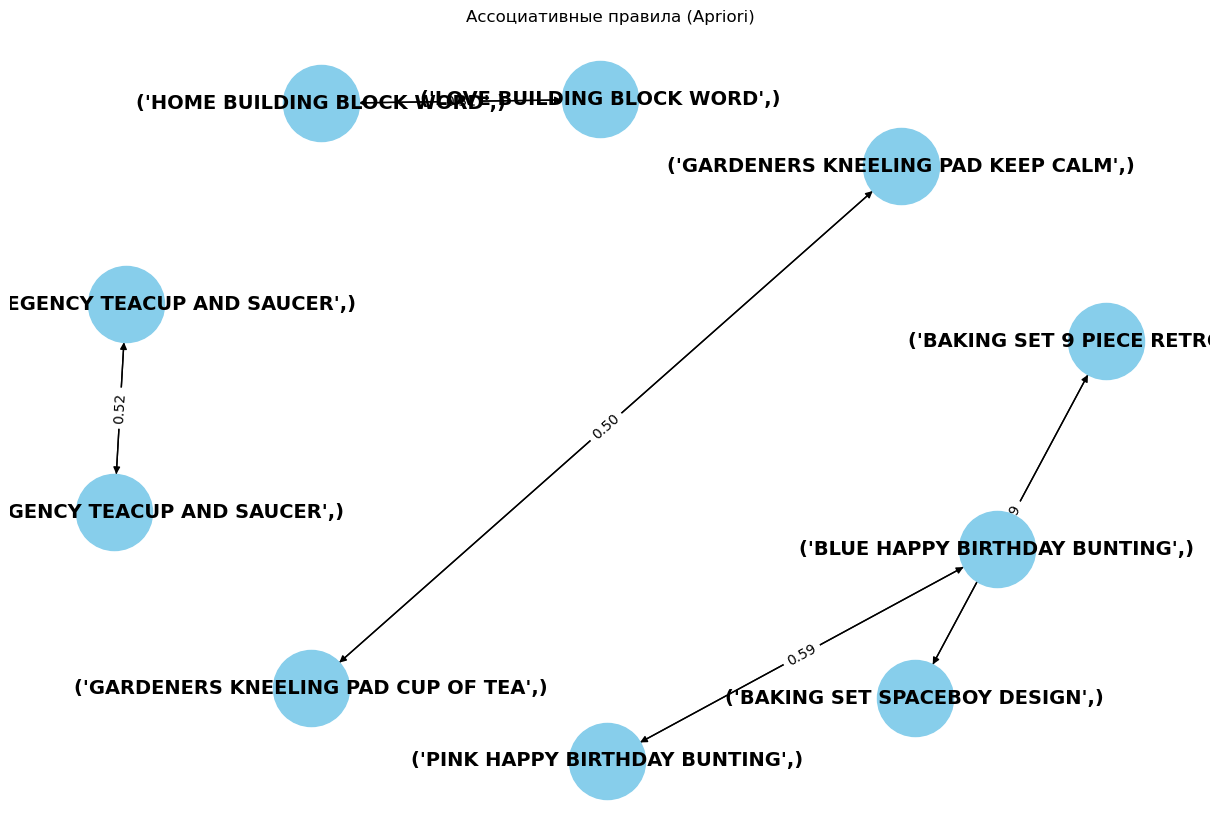

In [23]:
draw_graph(rules_0_001)

In [24]:
def draw_hatmap(rules):
      pivot_rules_table = rules.pivot(index='antecedents', columns='consequents', values='support')

      pivot_rules_table.index = pivot_rules_table.index.map(lambda x: ','.join(list(x)))
      pivot_rules_table.columns = pivot_rules_table.columns.map(lambda x: ','.join(list(x)))

      plt.figure(figsize=(10, 8))
      sns.heatmap(pivot_rules_table, annot=True, cmap='YlGnBu')
      plt.show()

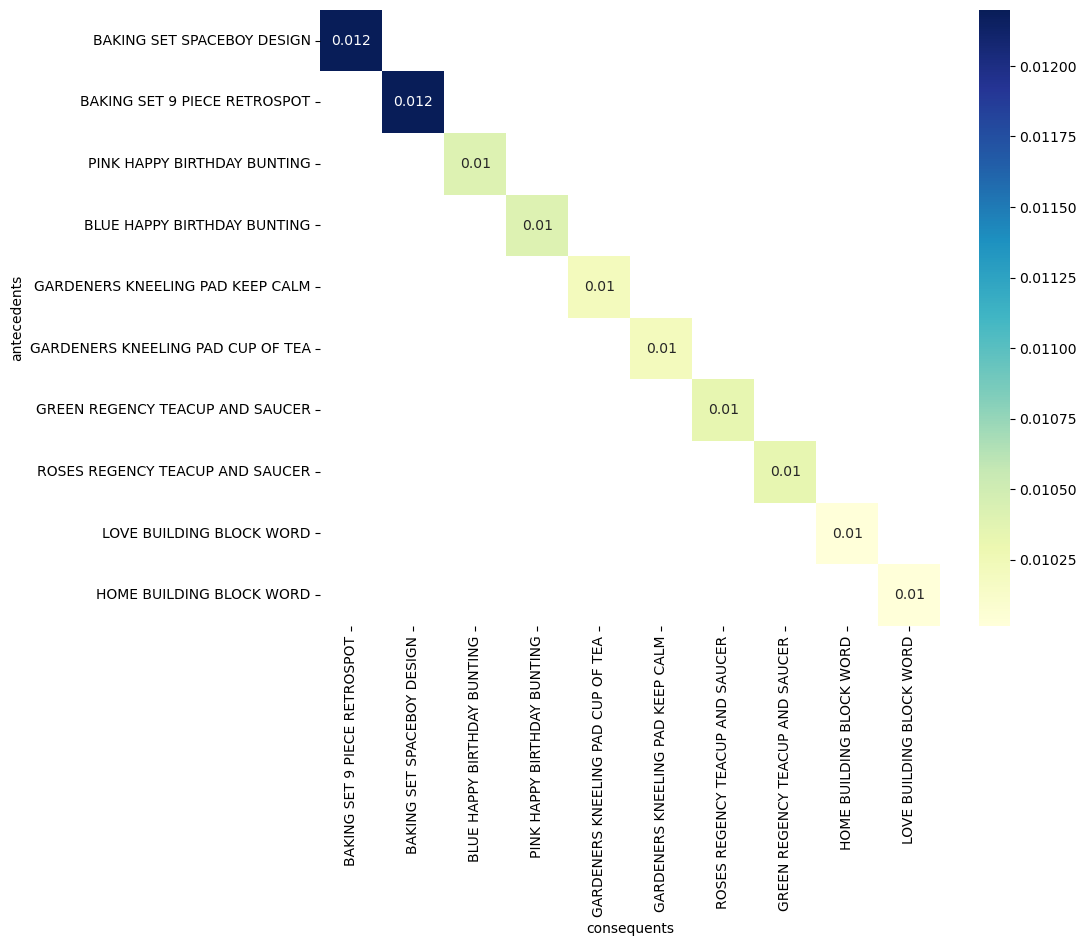

In [25]:
draw_hatmap(rules_0_001)

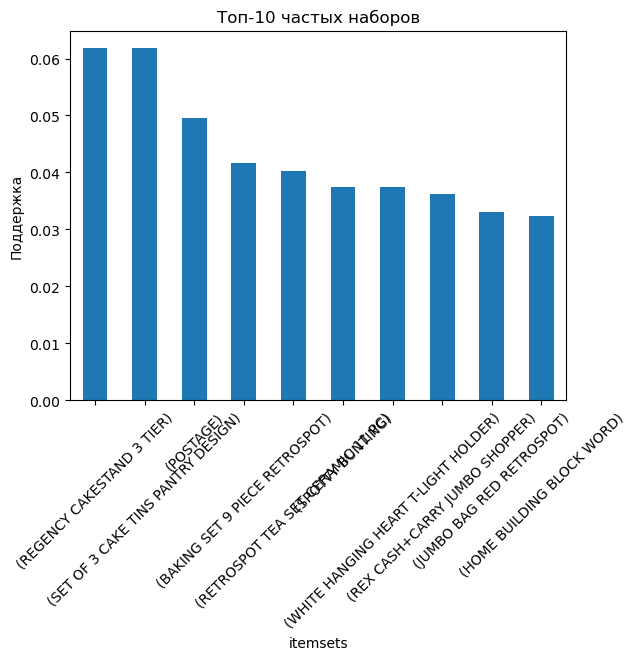

In [29]:
top_itemsets = apriory_retail_0_01.sort_values(by='support', ascending=False).head(10)
top_itemsets.plot.bar(x='itemsets', y='support', legend=False)
plt.title('Топ-10 частых наборов')
plt.ylabel('Поддержка')
plt.xticks(rotation=45)
plt.show()

### Аналіз конкретних правил:

Виберіть декілька найцікавіших асоціативних правил та детально проаналізуйте їх. Розгляньте можливі причини, чому ці правила є корисними для бізнесу, та як їх можна застосувати на практиці.

### Порівняння з іншими алгоритмами:

Досліджуйте інші алгоритми для пошуку асоціативних правил (наприклад, Eclat) та порівняйте їх результати з алгоритмом Apriori. Оцініть переваги та недоліки кожного з них.

In [30]:
max_traile_product_rows = len(max(retail_products, key=lambda x: len(x)))

max_traile_product_rows

707

In [31]:
retail_products_df = pd.DataFrame({
    index: row + [None] * (max_traile_product_rows - len(row)) for index, row in enumerate(retail_products)
}).T.reset_index(drop=True,)

retail_products_df

,0,1,2,3,4,5,6,7,8,9,...,697,698,699,700,701,702,703,704,705,706
0,LOVE BUILDING BLOCK WORD,BOX OF VINTAGE JIGSAW BLOCKS,HOME BUILDING BLOCK WORD,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,BLUE COAT RACK PARIS FASHION,RED COAT RACK PARIS FASHION,YELLOW COAT RACK PARIS FASHION,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,BATH BUILDING BLOCK WORD,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,POSTAGE,None,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,BALLOON ART MAKE YOUR OWN FLOWERS,RETROSPOT LARGE MILK JUG,FELT EGG COSY WHITE RABBIT,YOU'RE CONFUSING ME METAL SIGN,GLASS CLOCHE SMALL,BLUE OWL SOFT TOY,RETROSPOT TEA SET CERAMIC 11 PC,YELLOW BREAKFAST CUP AND SAUCER,PAPER CHAIN KIT RETROSPOT,PIGGY BANK RETROSPOT,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15570,SPOTTY BUNTING,POSTAGE,FANCY FONTS BIRTHDAY WRAP,WRAP CIRCUS PARADE,WRAP RED APPLES,WRAP ALPHABET POSTER,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
15571,ROLL WRAP VINTAGE SPOT,VINTAGE CHRISTMAS BUNTING,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
15572,PINK REGENCY TEACUP AND SAUCER,FELTCRAFT GIRL AMELIE KIT,CINAMMON & ORANGE WREATH,VINTAGE SNAP CARDS,WICKER WREATH SMALL,TEA TIME TEAPOT IN GIFT BOX,20 DOLLY PEGS RETROSPOT,EGG FRYING PAN RED,12 MESSAGE CARDS WITH ENVELOPES,CHRISTMAS CRAFT LITTLE FRIENDS,...,None,None,None,None,None,None,None,None,None,None
15573,LOVE HOT WATER BOTTLE,BOX OF 24 COCKTAIL PARASOLS,None,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [32]:
eclat = ECLAT(data=retail_products_df, verbose=True)

100%|██████████| 3754/3754 [00:00<00:00, 17378.76it/s]


In [ ]:
idxs, supports = eclat.fit(
    min_support=0.01,
    min_combination=1,
    max_combination=3,
    verbose=True
)

Combination 1 by 1


306it [01:59,  2.56it/s]


Combination 2 by 2


46665it [3:12:17,  4.04it/s] 


Combination 3 by 3


6277it [20:48,  5.22it/s]